<left>
<img src="idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 2 </H1>

In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})
%matplotlib inline

## Example 1: Height-Weight

In [171]:
data = pd.read_csv("weight-height.csv")
KGS_IN_POUND = 0.453592
CENT_IN_INCH = 2.54
data['Height'] = data['Height'] * CENT_IN_INCH
data['Weight'] = data['Weight'] * KGS_IN_POUND
data = data.sample(n = 100)

In [172]:
# we can find the solution as follows
x = data['Height']
y = data['Weight']

Z = np.column_stack((np.ones_like(y) , x))
A = np.dot( np.linalg.inv( np.dot( Z.T, Z ) ), Z.T)
beta_hat = np.dot(A, y)

print(f"beta0_hat = {beta_hat[0]}")
print(f"beta1_hat = {beta_hat[1]}")

beta0_hat = -161.32876191898
beta1_hat = 1.389139452825348


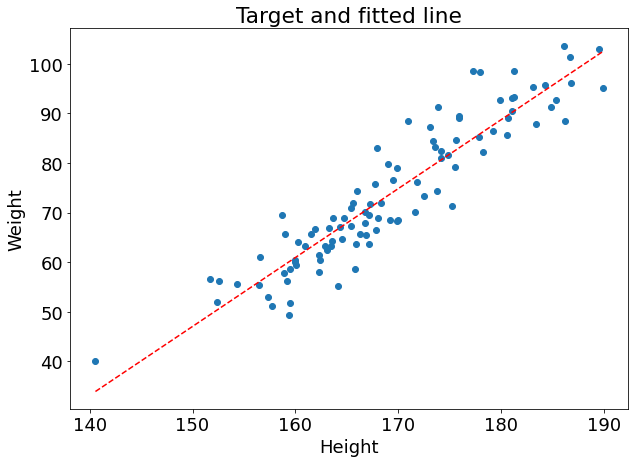

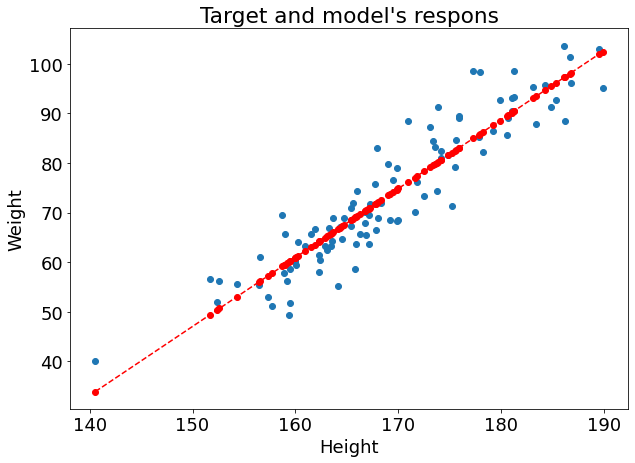

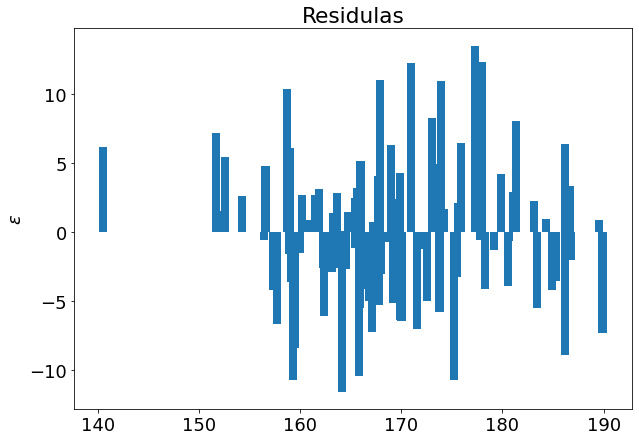

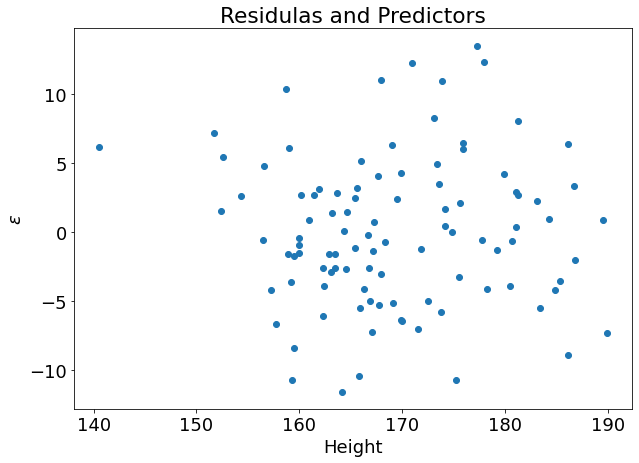

In [173]:
xx = np.linspace(x.min(), x.max(), 100)
y_hat = np.dot(Z, beta_hat)
yy = np.dot(np.column_stack((np.ones_like(xx) , xx)), beta_hat)

plt.scatter(x, y)
plt.plot(xx, yy, '--r')
plt.title("Target and fitted line")
plt.xlabel('Height')
plt.ylabel('Weight')

plt.show()

plt.scatter(x, y)
plt.plot(xx, yy, '--r')
plt.xlabel('Height')
plt.ylabel('Weight')


plt.scatter(x.values, y_hat, c='r')
plt.title("Target and model's respons")
plt.show()

# residuals
e = y - y_hat
plt.bar(x, e)
plt.ylabel(r'$\epsilon$')
plt.title("Residulas")
plt.show()

# residuals
plt.scatter(x, e)
plt.title("Residulas and Predictors")
plt.xlabel('Height')
plt.ylabel(r'$\epsilon$')
plt.show()

## Example 2: Housing Prices 

In [174]:
# 
data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots

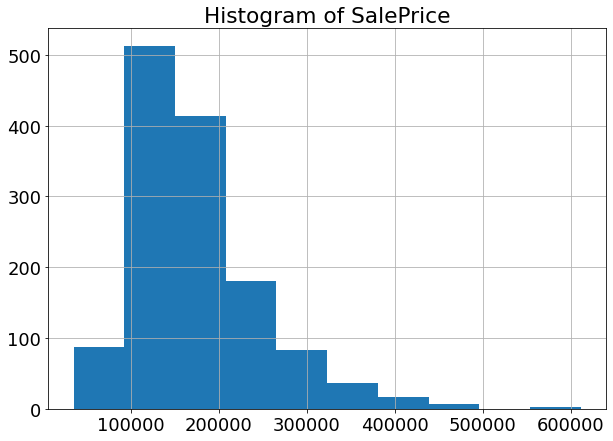

In [175]:
data['SalePrice'].hist()
plt.title("Histogram of SalePrice")
plt.show()

We have 80 possible predictors:

In [176]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We focus on three pedictors:
- ``LotArea``
- ``YearBuilt``

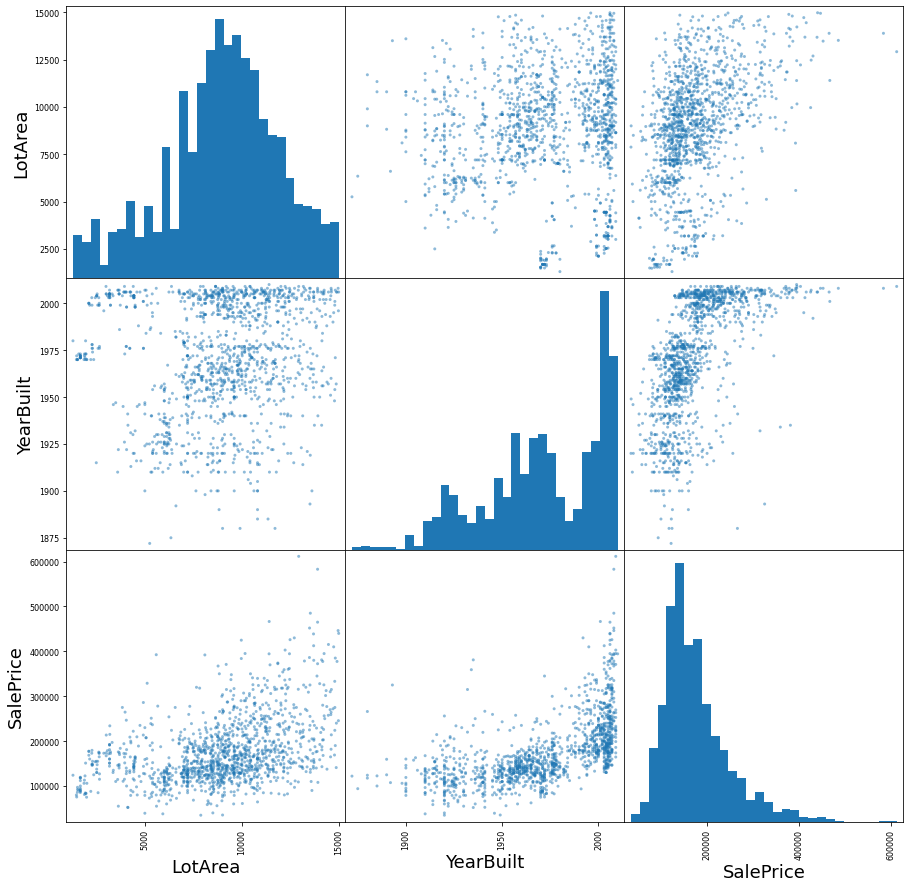

In [177]:
plt.rcParams['figure.figsize'] =  [15, 15]

data_red = data.filter(
    ['LotArea', 
    'YearBuilt',
    'SalePrice',
    ])

data['h-MSZoning'] = data.MSZoning.apply(hash) # convert this categorical data to numeric

pd.plotting.scatter_matrix(data_red,
            hist_kwds={'bins':30})

plt.show()
plt.rcParams["figure.figsize"] = (10,5)

In [181]:
import statsmodels.formula.api as smf

model = smf.ols(formula='SalePrice ~ LotArea + YearBuilt', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     606.5
Date:                Tue, 08 Mar 2022   Prob (F-statistic):          4.18e-188
Time:                        19:46:23   Log-Likelihood:                -16431.
No. Observations:                1338   AIC:                         3.287e+04
Df Residuals:                    1335   BIC:                         3.288e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.468e+06   9.27e+04    -26.610      0.000   -2.65e+06   -2.29e+06
LotArea        9.0723      0.490     18.509      0.000       8.111      10.034
YearBuilt   1299.5589     47.212     27.526      0.000    1206.942    1392.176
==============================================================================
Omnibus:                      406.920   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1473.090
Skew:                           1.453   Prob(JB):                         0.00
Kurtosis:                       7.241   Cond. No.                     6.25e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
x1 = data['LotArea'].values
x2 = data['YearBuilt'].values
y = data['SalePrice'].values

Z = np.vstack([np.ones_like(x1), x1, x2]).T
A = np.dot(np.linalg.inv(np.dot(Z.T,Z)), Z.T)
beta_hat = np.dot(A, y)

print("beta_hat = ", beta_hat)

beta_hat =  [-2.46808238e+06  9.07230986e+00  1.29955893e+03]


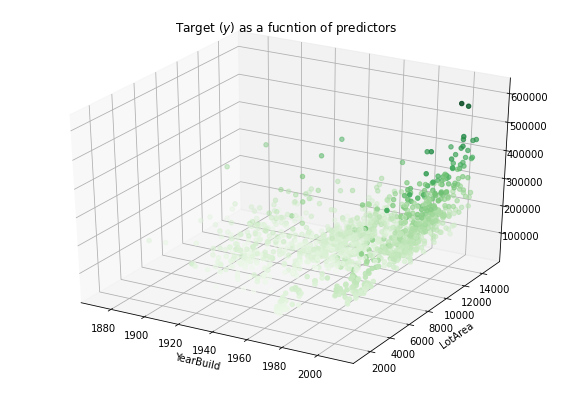

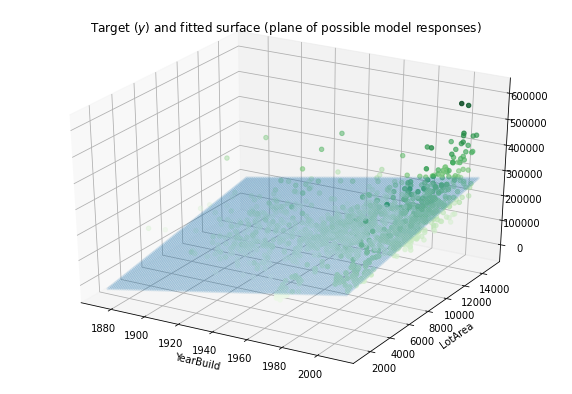

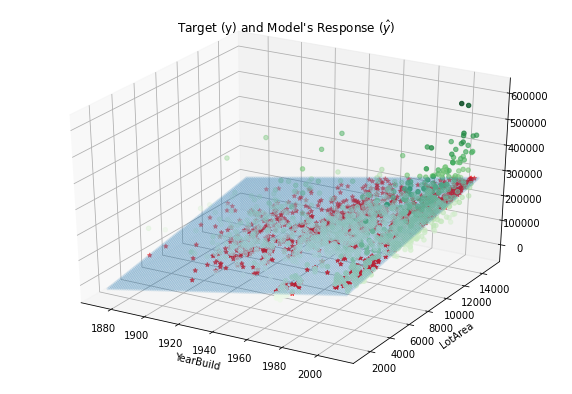

In [184]:
y_hat = np.dot(Z, beta_hat)
y = data['SalePrice']

#Data
zline = y
xline = data['YearBuilt'].values
yline = data['LotArea'].values

ax = plt.axes(projection='3d')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');
plt.title(r"Target ($y$) as a fucntion of predictors")
plt.xlabel('YearBuild')
plt.ylabel('LotArea')
plt.show()

# Data for a three-dimensional line
zline = y
xline = data['YearBuilt'].values
yline = data['LotArea'].values
# Data for creting the surface
xx,yy = np.meshgrid(np.linspace(xline.min(), xline.max(), 100),
                    np.linspace(yline.min(), yline.max(), 100)
                   )



plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 10})
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, zz, 'gray',alpha=.1, marker = '.')
plt.title(r"Target ($y$) and fitted surface (plane of possible model responses)")
plt.xlabel('YearBuild')
plt.ylabel('LotArea')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');
plt.show()


# model's response over the surface:
zz = model.predict(pd.DataFrame({'YearBuilt': xx.ravel(), 'LotArea' : yy.ravel()}, index=range(len(xx.ravel()))))

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 10})
ax = plt.axes(projection='3d')
ax.scatter3D(xx, yy, zz, 'gray',alpha=.1, marker = '.')
ax.scatter3D(xline, yline, zline, c=zline, cmap='Greens');
ax.scatter3D(xline, yline, y_hat, color='red', marker="*")
plt.title(r"Target (y) and Model's Response ($\hat{y}$)")
plt.xlabel('YearBuild')
plt.ylabel('LotArea')
plt.show()


We will see later on that the second model is considered better

## Distributions

In [ ]:
import scipy
G = 50
n = 1000
xx = np.linspace(-5, 5, G)
z = np.random.randn(n)
plt.hist(z, density=True, bins=xx)
plt.plot(xx, scipy.stats.norm.pdf(xx))
plt.title(f"Histogram of {n} samples from N(0,1)")
plt.show()

In [ ]:
# chisquared
G = 1000
n = 10000
k = 5
xmax = 20
xmin = 0
xx = np.linspace(xmin, xmax, G)
z = np.random.randn(n, k)

x = np.sum(z ** 2, axis=1)

plt.hist(x, density=True, bins=xx)
plt.plot(xx, scipy.stats.chi2.pdf(xx, k))
plt.title(f"Histogram of {n} samples from $\chi^2_{k}$")

plt.show()

In [ ]:
# chisquared
G = 100
n = 100000
k = 5

xmax = 5
xmin = -5
xx = np.linspace(xmin, xmax, G)
z = np.random.randn(n, k)
u = np.random.randn(n)

v = np.sum(z ** 2, axis=1)
x = u / np.sqrt(v / k)

plt.hist(x, density=True, bins=xx)
plt.plot(xx, scipy.stats.t.pdf(xx, k))
plt.title(f"Histogram of {n} samples from $t_{k}$")

plt.show()